# TD noté, 11 décembre 2015

Calcul des intérêt d'un emprunt pour acheter un appartement, stratégie d'investissement.

In [ ]:
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Après chaque question, on vérifie sur un petit exemple que cela fonctionne comme attendu.

## Exercice 1 : Louer ou acheter un appartement ? 

A surface égale, est-il préférable de louer ou d'acheter son appartement~? Cet exercice propose différentes questions afin d'y répondre.

### Q1 

On suppose qu'on a $X$ euros d'apport, écrire une fonction qui calcule la somme d'argent obtenue après $n$ années d'un placement à *r%* ? Par exemple, pour $n=2$, la fonction retourne $x + rx + r(1+r)x = (1+r)^2 x$.

In [ ]:
def rendement(x, n, r):
    return x*(1+r)**n

rendement(1, 2, 0.02)

1.0404

In [ ]:
rendement(1, 3, 0.02)

1.0612080000000002

### Q2

Une banque prête de l'argent à un taux annuel $p$, c'est-à-dire au taux mensuel $m=(1+p)^\frac{1}{12}-1$. Ce taux s'applique chaque mois sur la somme du capital restant à rembourser. On emprunte $K$ euros avec une mensualité fixée à $M$ euros, écrire une fonction qui décompose la mensualité $M$ en capital remboursé et intérêt.

In [ ]:
def decompose_mensualite(K,M,p):
    i = K * ((1+p)**(1.0/12)-1)
    return M-i, i

decompose_mensualite(180000, 1000, 0.029)

(570.6769646931234, 429.32303530687665)

### Q3 

Ecrire une fonction qui calcule toutes les mensualités.

Lors d'un prêt à taux fixe, en France tout du moins, ce que paye l'emprunteur à sa banque est un montant fixe par mois : la mensualité. L'emprunteur paye le même montant chaque mois. Chaque mensualité se décompose comme suit :

* les intêrets correspondant à la somme $K$ pour un mois : $i=Km$ où $m=(1+p)^{\frac{1}{12}}-1$
* la partie servant à rembourser le capital : $cap=M-i$

Cette partie $cap$ va être ôtée au capital $K$ à rembourser de sorte que le mois prochain, la somme prêtée pour le mois sera moindre. Le résulat souhaité pour cette question est une liste qui contient ce même montant $M$ $n$ fois. Ce $n$ correspond à la longueur du prêt. Et pour être plus précis, le même montant $M$ répété $n$ fois excepté pour la dernière mensualité.

In [ ]:
def mensualites(K,M,p):
    res = []
    while K > 0:
        cap, i = decompose_mensualite(K,M,p)
        if cap < 0:
            raise Exception("problème avec K={0} cap={1} i={2} len={3}".format(K,cap,i,len(res)))
        K -= cap
        if K < 0:
            res.append(M + K)
        else:
            res.append(M)
    return res

len(mensualites(180000,1000,0.029))/12

19.666666666666668

In [ ]:
mens = mensualites(180000,1000,0.029)
mens[:12]

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [ ]:
mens[-6:]

[1000, 1000, 1000, 1000, 1000, 459.63104825975415]

Parfois ce calcul entre dans une boucle infinie : cela signifie que la somme $K$ ou le taux d'intéret est trop grand pour la mensualité $M$. Par conséquence, les intérêts à rembourser chaque mois dépasse la mensualité. Le capital à rembourser, plutôt que de décroître augmente. La boucle infinie signifie que l'emprunteur a emprunté une somme au-dessus de ses moyens.

### Q4

Un emprunteur souhaite contracter un emprunt pour $Y$ années. La mensualité maximum qu'il peut consacrer par mois est $M$, le taux de l'emprunt est $p$. Quelle est la somme maximale qu'on puisse emprunter ? On se contentera d'une valeur approchée à 1000 euros près.

La fonction précédente estime la durée du prêt. Moins on emprunte, moins la durée est longue. On n'a pas besoin de 20 ans pour emprunter 1000€. L'idée consiste simplement à tester de 1000 en 1000 toutes les sommes jusqu'à ce que la durée du prêt dépasse $Y$ année soit $12Y$ mois.

In [ ]:
def somme_maximale(M,p,Y):
    K = 20000
    l = mensualites(K, M, p)
    while len(l) < Y*12:
        K += 1000
        l = mensualites(K, M, p)
    return K
        
somme_maximale(1000, 0.029, 20)

183000

**Remarque :** On pouvait également chercher la somme maximale au delà de laquelle le capital à rembourser augmente car la mensualité est utilisée intégralement pour payer les intérets. C'est-à-dire que la fonction ``decompose_mensualite`` retourne une valeur négative ou nulle soit la valeur de $K$ telle que $M = K \left ( (1+p)^{\frac{1}{12}}-1 \right)$. Dans ce cas, c'est comme si la durée du prêt devenait infinie. Cette somme est nécessairement supérieur à la valeur cherchée qui correspond à une durée de prêt finie.

**Remarque :** Est-on sûr que la longueur des bien ``Y*12`` ? 
    
En effet, rien de le garantit. Il faudrait s'assurer que le nombre de mensualités ne saute pas des années comme la version suivante où on passe 10000 en 10000 et la valeur est

In [ ]:
def somme_maximale_step(M,p,Y,step=10000):
    K = 20000
    l = mensualites(K, M, p)
    while len(l) < Y*12:
        K += step
        l = mensualites(K, M, p)
        if len(l) >= (Y-3)*10:
            print("K", K,"mois", len(l), "années", len(l)//12)
    return K
        
somme_maximale_step(1000, 0.029, 20)

K 140000 mois 171 années 14
K 150000 mois 186 années 15
K 160000 mois 202 années 16
K 170000 mois 219 années 18
K 180000 mois 236 années 19
K 190000 mois 254 années 21


190000

In [ ]:
somme_maximale_step(1000, 0.029, 20, step=1000)

K 139000 mois 170 années 14
K 140000 mois 171 années 14
K 141000 mois 173 années 14
K 142000 mois 174 années 14
K 143000 mois 176 années 14
K 144000 mois 177 années 14
K 145000 mois 179 années 14
K 146000 mois 180 années 15
K 147000 mois 182 années 15
K 148000 mois 183 années 15
K 149000 mois 185 années 15
K 150000 mois 186 années 15
K 151000 mois 188 années 15
K 152000 mois 190 années 15
K 153000 mois 191 années 15
K 154000 mois 193 années 16
K 155000 mois 194 années 16
K 156000 mois 196 années 16
K 157000 mois 197 années 16
K 158000 mois 199 années 16
K 159000 mois 201 années 16
K 160000 mois 202 années 16
K 161000 mois 204 années 17
K 162000 mois 206 années 17
K 163000 mois 207 années 17
K 164000 mois 209 années 17
K 165000 mois 210 années 17
K 166000 mois 212 années 17
K 167000 mois 214 années 17
K 168000 mois 215 années 17
K 169000 mois 217 années 18
K 170000 mois 219 années 18
K 171000 mois 220 années 18
K 172000 mois 222 années 18
K 173000 mois 224 années 18
K 174000 mois 226 an

183000

Même dans ce cas, on ne tombe pas exactement sur 20 ans. Il faudrait avoir une valeur pour ``step`` variable pour traiter tous les cas. Par exemple, dès que le nombre de mois augmente de plus de 1, on divise $K$ par 2. La précision serait au mois près.

In [ ]:
def somme_maximale_mois_step(M,p,Y,step=10000):
    K = 20000
    l = mensualites(K, M, p)
    l0 = l
    while len(l) < Y*12:
        while True:
            l = mensualites(K + step, M, p)
            if len(l) > len(l0) + 1:
                step /= 2
            else:
                K += step
                l0 = l
                break
        if len(l) >= (Y-1)*12:
            print("K", K,"mois", len(l), "années", len(l)//12, "step", step)
    return K
        
somme_maximale_mois_step(1000, 0.029, 20)

K 175312.5 mois 228 années 19 step 312.5
K 175625.0 mois 228 années 19 step 312.5
K 175937.5 mois 229 années 19 step 312.5
K 176250.0 mois 229 années 19 step 312.5
K 176562.5 mois 230 années 19 step 312.5
K 176875.0 mois 231 années 19 step 312.5
K 177187.5 mois 231 années 19 step 312.5
K 177500.0 mois 232 années 19 step 312.5
K 177812.5 mois 232 années 19 step 312.5
K 178125.0 mois 233 années 19 step 312.5
K 178437.5 mois 233 années 19 step 312.5
K 178750.0 mois 234 années 19 step 312.5
K 179062.5 mois 234 années 19 step 312.5
K 179375.0 mois 235 années 19 step 312.5
K 179687.5 mois 235 années 19 step 312.5
K 180000.0 mois 236 années 19 step 312.5
K 180312.5 mois 237 années 19 step 312.5
K 180625.0 mois 237 années 19 step 312.5
K 180937.5 mois 238 années 19 step 312.5
K 181250.0 mois 238 années 19 step 312.5
K 181562.5 mois 239 années 19 step 312.5
K 181875.0 mois 239 années 19 step 312.5
K 182187.5 mois 240 années 20 step 312.5


182187.5

### Q5 

A Paris, on loue un appartement pour $L$ euros du m$^2$. Un parisien loue son appartement de $S m^2$ pour $SL$ euros. Ce parisien peut dépenser $A$ euros par mois répartis en $SL$ le loyer et $A-SL$ les économies. Ecrire une fonction qui calcule les économies réalisées au bout de $Y$ années.

Après les études, ce parisien ne dispose d'aucun apport financier. Il commence par louer un appartement. Chaque mois, il envisage de consacrer  $A$ euros. Il loue un apprtement suffisamment de petit de telle sorte que le loyer est inférieur à $A$. Chaque mois, il économise la différence. Chaque euros économise est placé à taux fixe annuel $r$, donc au taux mensuel $rm = (1+r)^{\frac{1}{12}}-1$. Cette fonction calcule les économies réalisées.

In [ ]:
def economie(A,S,L,r,Y):
    delta = A - S*L
    rm = ((1+r)**(1.0/12)-1)
    eco = 0
    nbm = Y*12
    while nbm > 0:
        eco = eco * (1+rm) + delta
        nbm -= 1
    return eco

economie(1000,40,20,0.015,10)

25862.65218705509

### Q6

En considérant que ce même parisien ne peut dépenser plus de $A$ euros par mois, qu'il ne possède rien au début de sa carrière professionnelle, on veut savoir à partir de combien d'années il sera en mesure d'acheter son appartement à supposer qu'il peut se constituer un apport en capital issu de ces économies. On suppose que le prix au mètre carré à Paris est $C$ et qu'il veut emprunter avec un prêt d'une durée fixe. 


Si on résume, le parisen n'a pas les moyens d'acheter son appartement dès la fin de ses études. Il commence à louer et économise. La somme $A$ correspond à un tiers de son salaire, il sait également qu'avec une mensualité de $A$, il peut emprunter au maximum sur 20 ans `` somme_maximale(A,p,20)``. Il pourra donc acheter un appartement de la même surface lorsque ses économies ajoutées à la somme maximale qu'il peut emprunter dépasseront le prix de l'appartement.

On regarde chaque année si les économies accumulées permettent à ce parisien d'acheter.

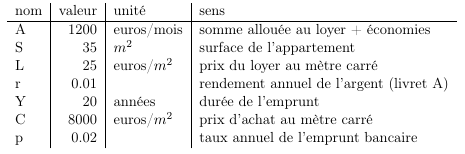

In [ ]:
from pyquickhelper.helpgen import NbImage
NbImage("exam2016_values.png")

In [ ]:
def bascule(A,S,L,r,Y,C,p):
    Y = 0
    possible = C*S
    while possible > 0:
        Y += 1
        eco = economie(A,S,L,r,Y)
        somme = somme_maximale(A,p,Y)
        possible = C*S - somme - eco
    return Y

bascule(1000,40,20,0.015,20,8000,0.029)

29

### Q7 exo 1

Ecrire une fonction qui détermine la plus petite surface que ce parisien ne pourra jamais s'offrir avant 20 ans au mètre carré près.

Le raisonnement est toujours le même, on regarde des plus petites surfaces aux plus grandes la surface que ce parisien pourra s'offrir. La fonction ``bascule`` indique quand un parisien peut acheter son appartement pour la première fois. Il suffit de partir d'une petite surface et de lui ajouter des mètres carrés jusqu'à ce que le moment de bascule se produise 20 ans après avoir commencé à travailler.

In [ ]:
def surface_max(A,L,r,Y,C,p,delay=20):
    S = 1
    wait = bascule(A,S,L,r,Y,C,p)
    while wait < delay:
        S += 1
        wait = bascule(A,S,L,r,Y,C,p)
    return S

surface_max(1000,20,0.015,20,8000,0.029)

34

### Q7 exo 2

Déterminer la somme $A$ qu'il faille investir pour acheter 40 $m^2$ à 30 ans en supposant que ce parisien a commencé à travailler à 23 ans et commence à louer un appartement de cette surface.

Le raisonnement est identique au question précédente. On commence par des mensualités $A$ élevées qu'on fait décroître jusqu'à ce que le parisien ne puisse plus s'offrir son appartement.

In [ ]:
def A40a30(L,r,Y,C,p):
    A = 10000
    S = 40
    wait = bascule(A,S,L,r,Y,C,p)
    while wait < 7:
        A -= 100
        wait = bascule(A,S,L,r,Y,C,p)
    return A

A40a30(20,0.015,20,8000,0.029)

2600

### Q8 

Ce modèle ne prend pas en compte tous les paramètres de la vie réelle. Citez-en un. 

* L'inflation
* Les augmentations de salaires
* L'augmentation du prix au mètre carré
* ...

### Q9 version dichotomique de Q4

On utilise la fonction *decompose_mensualite* pour calculer la somme maximale qu'une personne puisse emprunter avec une mensualité *M*, à savoir tout passe en intérêt ``M / ((1+p)**(1.0/12)-1)`` où celle qui correspond à un nombre de mensualité infini.

La réponse que l'on cherche est une somme mais celle-ci est une fonction croissante de la durée du prêt. Plutôt que de donner plus d'explications à ce sujet, je suggère de lire le problème [Problem C. Egg Drop](https://code.google.com/codejam/contest/32003/dashboard#s=p2). La même solution ne s'applique pas ici mais c'est le même état d'esprit qui permet de la trouver. La solution que je propose n'est pas nécessairement la meilleure mais elle est certainement plus rapide que la première proposée. 

La ligne avec ``###`` est la plus importante. On multiplie les pas de recherche pas un coefficient. Supérieur à 1 : l'algorithme ne peut pas converger. Inférieur à 1 : le pas doit être suffisamment grand pour converger vers la vraie valeur. Cela dépend de la dérivée $\frac{df}{dK}$ où $f$ est la durée du prêt ``len(mensualites(K, M, p))``.

In [ ]:
def somme_maximale_dicho(M,p,Y):
    K_max = M / ((1+p)**(1.0/12)-1)
    K = K_max / 2
    step = 0.5
    dk = K * step
    l = mensualites(K, M, p)
    while len(l) != Y*12 and dk > 1e-5:
        if len(l) < Y*12:
            K += dk
            K = min(K_max - 1000, K)
        else:
            K -= dk
        dk *= step   ###
        l = mensualites(K, M, p)
    if len(l) != Y*12:
        raise Exception("il faut augmenter step")
    return K
        
somme_maximale_dicho(1000, 0.029, 20)

182199.99817640134

Le paramètre ``dk`` donne une indication de la précision. On compare les temps d'exécution :

In [ ]:
%timeit somme_maximale(1000, 0.029, 20)
%timeit somme_maximale_dicho(1000, 0.029, 20)

10 loops, best of 3: 25.7 ms per loop
100 loops, best of 3: 2.8 ms per loop


## Exercice 2 : coder les numéros de téléphone

### Q1 

Michel perd souvent ses carnets de numéros et pour éviter d'importuner ses proches de recevoir des coups de fils impromptus, il utilise un code. Si la première lettre est une voyelle, il permute les numéros 3 et 4 sinon il les laisse en l'état. Si la seconde lettre est une voyelle, il permute les numéros 5 et 6, rien en cas de consonnes. Exemple (on enlève volontairement les accents) :

    adele   06 64 34 22 67 --> 06 46 34 22 67
    gerard  06 64 34 22 68 --> 06 64 43 22 86
    
Ecrire la fonction qui transforme un numéro. Il est recommandé de ne pas tenir compte des espaces.

In [ ]:
def transforme_numero(prenom, numero):
    res = numero[:2]
    for i, c in enumerate(prenom):
        if c in "aeiouy":
            res += numero[i*2+3] + numero[i*2+2]
        else:
            res += numero[i*2+2:i*2+4]
        if len(res) >= len(numero):
            break
    return res

transforme_numero("adele", "0664342267")

'0646342267'

### Q2 

Ecrire la fonction qui effectue la transformation inverse. La réciproque est en fait la même fonction.

In [ ]:
transforme_numero("adele", "0646342267")

'0664342267'

## Exercice 3 : coder les numéros de téléphone

### Q1

Michel perd souvent ses carnets de numéros et pour éviter d'importuner ses proches de recevoir des coups de fils impromptus, il utilise un code. Si la première lettre est une voyelle, il fait la somme des chiffres 3 et 4 et remplace le chiffre 4 par celui des unités de l'addition, sinon il les laisse en l'état. Si la seconde lettre est une voyelle, il additionne les chiffres 5 et 6 et remplace le chiffre 6 par celui des unités de l'addition, rien en cas de consonnes. Exemple (on enlève volontairement les accents) :

    adele   06 64 34 22 67 --> 06 60 34 24 67
    gerard  06 64 34 22 68 --> 06 64 37 22 64

Ecrire la fonction qui transforme un numéro. Il est recommandé de ne pas tenir compte des espaces.

In [ ]:
def transforme_numero(prenom, numero):
    res = numero[:2]
    for i, c in enumerate(prenom):
        if c in "aeiouy":
            res += numero[i*2+2] + str ( (int(numero[i*2+2]) + int(numero[i*2+3])) % 10)
        else:
            res += numero[i*2+2:i*2+4]
        if len(res) >= len(numero):
            break
    return res

transforme_numero("adele", "0664342267")

'0660342467'

### Q2

A votre avis, est-il possible d'écrire la fonction qui effectue la transformation inverse. Justifiez.

Oui et voici la réciproque. On considère un groupe de chiffre modifié, l'important est de comprendre que si le second chiffre est inférieur au premier alors la somme des deux chiffres initiaux dépasse nécessairement 10.

In [ ]:
def transforme_numero_envers(prenom, numero):
    res = numero[:2]
    for i, c in enumerate(prenom):
        if c in "aeiouy":
            res += numero[i*2+2] + str ( (int(numero[i*2+3]) - int(numero[i*2+2]) + 10) % 10)
        else:
            res += numero[i*2+2:i*2+4]
        if len(res) >= len(numero):
            break
    return res

transforme_numero_envers("adele", "0660342467")

'0664342267'

**Remarque :** Beaucoup ont affronté l'erreur suivante

In [ ]:
# déclenche une exception
"3" < 4

TypeError: unorderable types: str() < int()

Comme l'exemple le stipule, cela survient lorsqu'on essaye de faire une comparison numérique entre une chaîne de caractères et un type numérique. Il faut convertir la chaîne de caractères.

In [ ]:
int("3") < 4

True